# analysisng with just ip, port and protocol 


In [1]:
import pandas as pd
import numpy as np
import random
from preprocess_no_eth import process_df
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



normal_df = pd.read_csv('data/normal1.csv')
processed_normal = process_df(normal_df)

attack_df = pd.read_csv('data/attack1.csv')
processed_attack = process_df(attack_df)

In [2]:
x_normal_train, x_normal_test = train_test_split(processed_normal.values, test_size=0.2, random_state=42)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(10, input_dim=processed_normal.values.shape[1], activation='LeakyReLU'))
model.add(Dense(3, activation='LeakyReLU')) # size to compress to
model.add(Dense(10, activation='LeakyReLU'))
model.add(Dense(processed_normal.values.shape[1])) # Multiple output neurons
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_normal_train,x_normal_train,verbose=1,epochs=20)
model.save("really_basic_model")

Metal device set to: Apple M1 Pro
Epoch 1/20


2022-03-20 21:25:31.944870: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-20 21:25:31.944987: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-03-20 21:25:32.018366: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-20 21:25:32.127363: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3514/3514 [==============================] - 13s 4ms/step - loss: 0.0155
Epoch 2/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0027
Epoch 3/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0020
Epoch 4/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0017
Epoch 5/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0014
Epoch 6/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0013
Epoch 7/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0012
Epoch 8/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0011
Epoch 9/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0011
Epoch 10/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0011
Epoch 11/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0010
Epoch 12/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0010


2022-03-20 21:29:51.550018: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: really_basic_model/assets


INFO:tensorflow:Assets written to: really_basic_model/assets


In [4]:
from sklearn import metrics
pred_normal_train = model.predict(x_normal_train)
print(np.sqrt(metrics.mean_squared_error(pred_normal_train,x_normal_train)))

pred_normal_test = model.predict(x_normal_test)
print(np.sqrt(metrics.mean_squared_error(pred_normal_test,x_normal_test)))


2022-03-20 21:29:51.808037: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0.03162346458713993
0.03129825181221973


In [24]:
pro_values = processed_attack.values
pred_attack = model.predict(pro_values)

<AxesSubplot:>

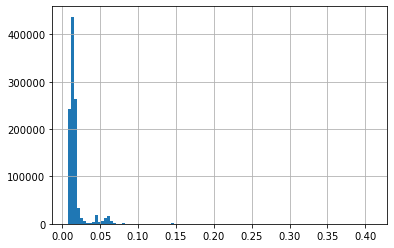

In [25]:
score_list = []
for index, x in enumerate(pred_attack):
    score_list.append(np.sqrt(metrics.mean_squared_error(pred_attack[index],pro_values[index])))

attack_df['score'] = score_list
attack_df['score'].hist(bins = 100)

0.05442013618454919

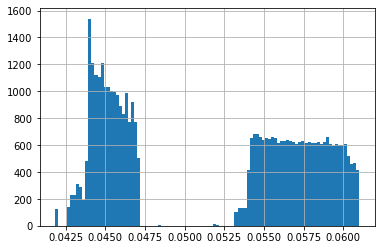

In [26]:
nmap_df = attack_df[attack_df["ip.dst"] == '89.100.107.148']


# In[15]:


nmap_df['score'].hist(bins = 100)


# In[20]:


nmap_df['score'].median()

<AxesSubplot:>

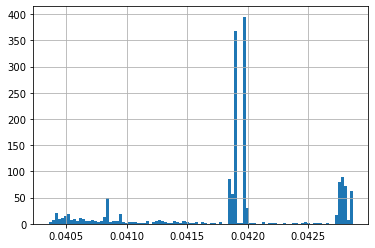

In [27]:
normal_wordpress = attack_df[attack_df["ip.dst"] == '89.100.107.147']
normal_wordpress['score'].hist(bins=100)

In [33]:
attack_df.to_csv("possible_good.csv")

(array([2.42935e+05, 4.37416e+05, 2.62636e+05, 3.36320e+04, 1.18130e+04,
        5.64800e+03, 2.27400e+03, 1.12200e+03, 3.86900e+03, 1.78450e+04,
        3.44300e+03, 6.26900e+03, 1.32280e+04, 1.66430e+04, 5.54000e+03,
        7.14000e+02, 8.90000e+01, 1.73000e+02, 7.86000e+02, 4.26000e+02,
        6.02000e+02, 2.78000e+02, 2.70000e+01, 7.40000e+01, 2.50000e+01,
        3.60000e+01, 3.70000e+01, 2.90000e+01, 6.20000e+01, 1.25000e+02,
        8.40000e+01, 3.90000e+01, 1.00000e+01, 1.80000e+02, 6.41000e+02,
        7.60000e+01, 2.95000e+02, 6.33000e+02, 1.64000e+02, 5.60000e+01,
        2.90000e+01, 2.00000e+00, 0.00000e+00, 1.30000e+01, 1.00000e+00,
        9.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 3.40000e+01, 1.10000e+01, 1.00000e+02, 4.20000e+01,
        3.50000e+01, 1.00000e+01, 3.70000e+01, 1.33000e+02, 5.50000e+01,
        2.00000e+01, 0.00000e+00, 0.00000e+00, 1.10000e+01, 0.00000e+00,
        0.00000e+00, 6.00000e+00, 8.00000e+00, 6.00

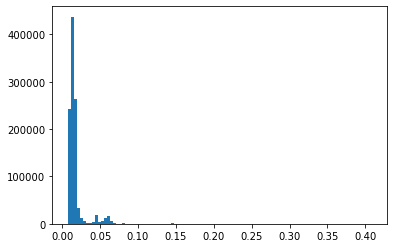

In [31]:
plt.hist(list(attack_df['score']), bins = 100)

In [35]:
attack_df['score'].describe().apply(lambda x: format(x, 'f'))

count    1070554.000000
mean           0.017102
std            0.013802
min            0.007243
25%            0.011592
50%            0.013879
75%            0.016888
max            0.408806
Name: score, dtype: object

In [36]:
nmap_df['score'].describe().apply(lambda x: format(x, 'f'))

count    41824.000000
mean         0.051797
std          0.006262
min          0.041816
25%          0.045312
50%          0.054420
75%          0.057556
max          0.061013
Name: score, dtype: object

In [39]:
attack_df['score'].quantile(0.95)

0.04662901628694813